# 1. Install and import libraries

In [ ]:
!pip install ktrain
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 981 kB 43.3 MB/s 
     |████████████████████████████████| 263 kB 60.7 MB/s 
     |████████████████████████████████| 3.8 MB 30.0 MB/s 
     |████████████████████████████████| 1.3 MB 54.6 MB/s 
     |████████████████████████████████| 468 kB 59.6 MB/s 
     |████████████████████████████████| 120 kB 48.5 MB/s 
     |████████████████████████████████| 7.0 MB 44.5 MB/s 
     |████████████████████████████████| 880 kB 57.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.9-py3-none-any.whl size=25312871 sha256=c878fba5330796dd0811ddbfc9d0bb24afcb6d85269404460f3505be57cfae31
  Stored in directory: /root/.cache/pip/wheels/35/f1/88/c7d6e7d0025eb5635327e62f12ca5fbb24e1502dd257a7aa77
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=656c1becdc68c7427007ff5d

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 45.7 MB/s 
     |████████████████████████████████| 16.7 MB 355 kB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import re
import string
import nltk
import seaborn as sns
from torch.utils.data import Dataset, DataLoader

nltk.download("stopwords")
from nltk.corpus import stopwords
import re

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from gensim.models.fasttext import FastText

nltk.download('punkt')
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import unidecode

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'

#Display every call in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
phd_path = 'gdrive/My Drive'
path = os.path.join(phd_path, 'Perceptia_fiscalitatii')

Mounted at /content/gdrive


# 2. Read data

In [ ]:
df = pd.read_csv(os.path.join(path, 'data', 'Taxpayer perception on the Fiscal System 367 responses 03.11.2021.csv'))
# df = df.drop(columns=[df.columns[1], df.columns[2], df.columns[3], df.columns[4]])
# df = df.rename(columns={df.columns[0]:'incredere_sist_fiscal', df.columns[1]: 'parere_sist_fiscal'})
df.head(3)

,How do you evaluate your level of trust in the Tax System?,What do you think of your national Tax Sistem?,What displeases you about the Tax System?,"In your opinion, what does the current Tax System offer?","If you were the Minister of Public Finance, what would you change about the Tax System?","In your opinion, how important are these aspects for a Tax System? [Transparency ]","In your opinion, how important are these aspects for a Tax System? [Value for money]","In your opinion, how important are these aspects for a Tax System? [Economical (Efficiency)]","In your opinion, how important are these aspects for a Tax System? [Trust]","In your opinion, how important are these aspects for a Tax System? [Social welfare]",...,Which of the following measures you think could enhance tax compliance? [Exemption from taxes related to the realization of some investments],Which of the following measures you think could enhance tax compliance? [Providing quality public services],Which of the following measures you think could enhance tax compliance? [Building a climate of trust between the citizen and the state],Which of the following measures you think could enhance tax compliance? [Making the necessary public investments for socio-economic development],Which of the following measures you think could enhance tax compliance? [Increasing the degree of transparency regarding the way public money is spent],What age are you?,What gender are you?,Country of residence:,Confidence in EU institutions,Greenhouse gas emissions intensity of energy consumption
0,3.0,4.0,Complicatedness of tax acts and incessant chan...,I do not understand the question.,I would emphasize a digitalization of tax admi...,4.0,4.0,3.0,4.0,3.0,...,2.0,4.0,3.0,3.0,5.0,28.0,Male,The Czech Republic,50.0,71.0
1,8.0,8.0,Good,"Public services, such as infrastructure, healt...",Nothing special,4.0,4.0,4.0,4.0,3.0,...,4.0,4.0,4.0,4.0,4.0,NaN,Prefer not to say,Serbia,46.0,72.0
2,1.0,2.0,"Very slow, inefficient, unfair, law transparen...",Not much for business people or employees,Almost everything,5.0,5.0,5.0,5.0,5.0,...,5.0,4.0,4.0,5.0,5.0,36.0,Male,Bosnia and Herzegovina,44.0,75.0


In [ ]:
df.shape

(552, 44)

# 3. Predict sentiment for the columns corresponding to the answers to open questions

In [ ]:
text_columns = [df.columns[2], df.columns[3], df.columns[4]]
text_columns

['What displeases you about the Tax System?',
 'In your opinion, what does the current Tax System offer?',
 'If you were the Minister of Public Finance, what would you change about the Tax System?']

In [ ]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=230bf8932485393d883c24f65b9dbf469038cf657967c0e27fb5ebd74d5662b7
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
# Lexicons
from textblob import TextBlob
from afinn import Afinn
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from sklearn.metrics import classification_report

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
TextBlob('This restaurant has OK food :(').sentiment 

Sentiment(polarity=-0.125, subjectivity=0.75)

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('This restaurant has OK food :(') # works good for social media 

{'neg': 0.295, 'neu': 0.407, 'pos': 0.298, 'compound': 0.0085}

In [ ]:
Afinn().score('This restaurant has OK food :(')

0.0

Treating missing values

In [ ]:
df[text_columns].isnull().values.any()

True

In [ ]:
df[text_columns] = df[text_columns].fillna("")

In [ ]:
df[text_columns].isnull().values.any()

False

Apply a lexicon to compute sentiment polarity for each text column

In [ ]:
for text_column in text_columns:
  df[f'Sentiment {text_column}'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
  # df[f'Sentiment {text_column}'] = df[text_column].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound']) # to apply vader as a lexicon

df.head()

,How do you evaluate your level of trust in the Tax System?,What do you think of your national Tax Sistem?,What displeases you about the Tax System?,"In your opinion, what does the current Tax System offer?","If you were the Minister of Public Finance, what would you change about the Tax System?","In your opinion, how important are these aspects for a Tax System? [Transparency ]","In your opinion, how important are these aspects for a Tax System? [Value for money]","In your opinion, how important are these aspects for a Tax System? [Economical (Efficiency)]","In your opinion, how important are these aspects for a Tax System? [Trust]","In your opinion, how important are these aspects for a Tax System? [Social welfare]",...,Which of the following measures you think could enhance tax compliance? [Making the necessary public investments for socio-economic development],Which of the following measures you think could enhance tax compliance? [Increasing the degree of transparency regarding the way public money is spent],What age are you?,What gender are you?,Country of residence:,Confidence in EU institutions,Greenhouse gas emissions intensity of energy consumption,Sentiment What displeases you about the Tax System?,"Sentiment In your opinion, what does the current Tax System offer?","Sentiment If you were the Minister of Public Finance, what would you change about the Tax System?"
0,3.0,4.0,Complicatedness of tax acts and incessant chan...,I do not understand the question.,I would emphasize a digitalization of tax admi...,4.0,4.0,3.0,4.0,3.0,...,3.0,5.0,28.0,Male,The Czech Republic,50.0,71.0,0.000000,0.000000,0.000000
1,8.0,8.0,Good,"Public services, such as infrastructure, healt...",Nothing special,4.0,4.0,4.0,4.0,3.0,...,4.0,4.0,NaN,Prefer not to say,Serbia,46.0,72.0,0.700000,0.000000,0.357143
2,1.0,2.0,"Very slow, inefficient, unfair, law transparen...",Not much for business people or employees,Almost everything,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,36.0,Male,Bosnia and Herzegovina,44.0,75.0,-0.463333,-0.100000,0.000000
3,7.0,7.0,inequality of taxes applied for different taxp...,"question is not clear: for me, in general, or ...",reduce the number of exceptions applied,4.0,4.0,5.0,5.0,5.0,...,5.0,5.0,41.0,Female,Lithuania,69.0,104.0,0.000000,0.119048,0.000000
4,8.0,7.0,Some people do not pay taxes,Inequality,Fight against tax evasion,5.0,4.0,5.0,5.0,5.0,...,5.0,4.0,41.0,Male,Italy,49.0,80.0,0.000000,0.000000,0.000000


In [ ]:
df = df.head(366)

In [ ]:
df.iloc[: , -3:].describe()

,Sentiment What displeases you about the Tax System?,"Sentiment In your opinion, what does the current Tax System offer?","Sentiment If you were the Minister of Public Finance, what would you change about the Tax System?"
count,366.000000,366.000000,366.000000
mean,0.044689,0.052044,0.110544
std,0.213184,0.175645,0.206715
min,-1.000000,-0.500000,-0.500000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.160000,0.033333,0.250000
max,0.875000,0.700000,0.800000


In [ ]:
df.to_csv(os.path.join(path, 'data', 'Taxpayer perception on the Fiscal System 367 responses 03.11.2021 with sentiments.csv'), index=False)

# 4. Skip predict, load from disk

In [ ]:
df = pd.read_csv(os.path.join(path, 'data', 'Taxpayer perception on the Fiscal System 367 responses 03.11.2021 with sentiments.csv'))
df.head(2)

,How do you evaluate your level of trust in the Tax System?,What do you think of your national Tax Sistem?,What displeases you about the Tax System?,"In your opinion, what does the current Tax System offer?","If you were the Minister of Public Finance, what would you change about the Tax System?","In your opinion, how important are these aspects for a Tax System? [Transparency ]","In your opinion, how important are these aspects for a Tax System? [Value for money]","In your opinion, how important are these aspects for a Tax System? [Economical (Efficiency)]","In your opinion, how important are these aspects for a Tax System? [Trust]","In your opinion, how important are these aspects for a Tax System? [Social welfare]",...,Which of the following measures you think could enhance tax compliance? [Making the necessary public investments for socio-economic development],Which of the following measures you think could enhance tax compliance? [Increasing the degree of transparency regarding the way public money is spent],What age are you?,What gender are you?,Country of residence:,Confidence in EU institutions,Greenhouse gas emissions intensity of energy consumption,Sentiment What displeases you about the Tax System?,"Sentiment In your opinion, what does the current Tax System offer?","Sentiment If you were the Minister of Public Finance, what would you change about the Tax System?"
0,3.0,4.0,Complicatedness of tax acts and incessant chan...,I do not understand the question.,I would emphasize a digitalization of tax admi...,4.0,4.0,3.0,4.0,3.0,...,3.0,5.0,28.0,Male,The Czech Republic,50.0,71.0,0.0,0.0,0.000000
1,8.0,8.0,Good,"Public services, such as infrastructure, healt...",Nothing special,4.0,4.0,4.0,4.0,3.0,...,4.0,4.0,NaN,Prefer not to say,Serbia,46.0,72.0,0.7,0.0,0.357143


# 5. Geolocate the data

In [ ]:
df['Country of residence:'].head(30)

0          The Czech Republic
1                      Serbia
2     Bosnia and Herzegovina 
3                   Lithuania
4                       Italy
5                       Italy
6                     Romania
7                      Turkey
8                       Italy
9                      Poland
10                    Romania
11                    Romania
12                    Romania
13                    Romania
14                     France
15                    france 
16                     FRANCE
17                     France
18                    France 
19                     France
20                     France
21                     France
22                     FRANCE
23                     FRANCE
24                     France
25                     France
26                     France
27                     France
28                     France
29                     France
Name: Country of residence:, dtype: object

In [ ]:
df['Country of residence:'] = df['Country of residence:'].apply(lambda x: x.title().strip())
df['Country of residence:'].head(30)

0         The Czech Republic
1                     Serbia
2     Bosnia And Herzegovina
3                  Lithuania
4                      Italy
5                      Italy
6                    Romania
7                     Turkey
8                      Italy
9                     Poland
10                   Romania
11                   Romania
12                   Romania
13                   Romania
14                    France
15                    France
16                    France
17                    France
18                    France
19                    France
20                    France
21                    France
22                    France
23                    France
24                    France
25                    France
26                    France
27                    France
28                    France
29                    France
Name: Country of residence:, dtype: object

In [ ]:
len(df['Country of residence:'].unique()) # 23 countries for which we have answers

23

In [ ]:
eu_nuts = gpd.read_file(os.path.join(path, 'data', 'shapefiles', 'NUTS_RG_20M_2021_3035.shp'))
eu_nuts.shape
eu_nuts.head(2)

(2010, 10)

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961..."
1,HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483..."


In [ ]:
eu_countries = eu_nuts.dissolve(by='CNTR_CODE')
eu_countries.drop(columns=['NUTS_ID', 'LEVL_CODE', 'NAME_LATN', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID'], inplace=True)
eu_countries.reset_index(inplace=True)
eu_countries.shape
eu_countries.head(2)

(37, 2)

,CNTR_CODE,geometry
0,AL,"POLYGON ((5205929.468 1908629.067, 5200528.618..."
1,AT,"POLYGON ((4527096.498 2619689.619, 4510728.830..."


In [ ]:
eu_countries.rename(columns={'CNTR_CODE':'country_code'},inplace=True)
eu_countries.head(2)

,country_code,geometry
0,AL,"POLYGON ((5205929.468 1908629.067, 5200528.618..."
1,AT,"POLYGON ((4527096.498 2619689.619, 4510728.830..."


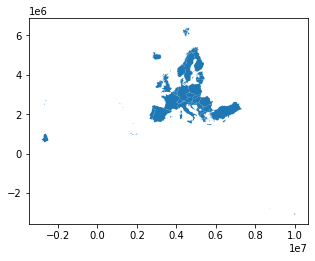

In [ ]:
eu_countries.plot()

In [ ]:
# eu_countries.to_file(os.path.join(path, 'data', 'shapefiles', 'eu_countries.shp'), index=False)

In [ ]:
country_codes = pd.read_csv(os.path.join(path, 'data', 'country_codes_europe.csv'))
country_codes = country_codes[['country', 'country_code']]
country_codes.rename(columns={'country': 'country_of_residence'}, inplace=True)
country_codes.shape
country_codes.head()

(52, 2)

,country_of_residence,country_code
0,Austria,AT
1,Belgium,BE
2,Bulgaria,BG
3,Croatia,HR
4,Cyprus,CY


In [ ]:
df['country_of_residence'].replace(to_replace='The Czech Republic', value='Czech Republic', inplace=True)
df['country_of_residence'].replace(to_replace='Bosnia And Herzegovina', value='Bosnia and Herzegovina', inplace=True)

df['country_of_residence'].unique()

array(['Czech Republic', 'Serbia', 'Bosnia and Herzegovina', 'Lithuania',
       'Italy', 'Romania', 'Turkey', 'Poland', 'France', 'Switzerland',
       'China', 'United Kingdom', 'Germany', 'Estonia', 'Netherlands',
       'Slovakia', 'Kingdom Of Saudi Arabia', 'Spain', 'Armenia',
       'Norway', 'Portugal', 'Austria', 'Turkmenistan'], dtype=object)

In [ ]:
df.rename(columns={'Country of residence:': 'country_of_residence'},inplace=True)
df.shape

(366, 47)

In [ ]:
df_with_country_codes = df.merge(country_codes, on='country_of_residence', how='inner')
df_with_country_codes.shape

(363, 48)

In [ ]:
df_with_country_codes.head(3)

,How do you evaluate your level of trust in the Tax System?,What do you think of your national Tax Sistem?,What displeases you about the Tax System?,"In your opinion, what does the current Tax System offer?","If you were the Minister of Public Finance, what would you change about the Tax System?","In your opinion, how important are these aspects for a Tax System? [Transparency ]","In your opinion, how important are these aspects for a Tax System? [Value for money]","In your opinion, how important are these aspects for a Tax System? [Economical (Efficiency)]","In your opinion, how important are these aspects for a Tax System? [Trust]","In your opinion, how important are these aspects for a Tax System? [Social welfare]",...,Which of the following measures you think could enhance tax compliance? [Increasing the degree of transparency regarding the way public money is spent],What age are you?,What gender are you?,country_of_residence,Confidence in EU institutions,Greenhouse gas emissions intensity of energy consumption,Sentiment What displeases you about the Tax System?,"Sentiment In your opinion, what does the current Tax System offer?","Sentiment If you were the Minister of Public Finance, what would you change about the Tax System?",country_code
0,3.0,4.0,Complicatedness of tax acts and incessant chan...,I do not understand the question.,I would emphasize a digitalization of tax admi...,4.0,4.0,3.0,4.0,3.0,...,5.0,28.0,Male,Czech Republic,50.0,71.0,0.0,0.0,0.000000,CZ
1,8.0,8.0,Good,"Public services, such as infrastructure, healt...",Nothing special,4.0,4.0,4.0,4.0,3.0,...,4.0,NaN,Prefer not to say,Serbia,46.0,72.0,0.7,0.0,0.357143,RS
2,3.0,3.0,Not efficient,Development of country in every way,Much better tax collection,5.0,5.0,5.0,5.0,5.0,...,5.0,43.0,Male,Serbia,46.0,72.0,0.0,0.0,0.500000,RS


In [ ]:
gdf_with_country_codes = eu_countries.merge(df_with_country_codes, on='country_code')
gdf_with_country_codes.shape

(361, 49)

In [ ]:
gdf_with_country_codes.iloc[: , -5:].describe()

,Confidence in EU institutions,Greenhouse gas emissions intensity of energy consumption,Sentiment What displeases you about the Tax System?,"Sentiment In your opinion, what does the current Tax System offer?","Sentiment If you were the Minister of Public Finance, what would you change about the Tax System?"
count,361.000000,361.000000,361.000000,361.000000,361.000000
mean,52.667590,84.925208,0.045206,0.051518,0.110135
std,8.343679,4.007278,0.211587,0.173376,0.206830
min,33.000000,66.000000,-1.000000,-0.500000,-0.500000
25%,55.000000,84.000000,0.000000,0.000000,0.000000
50%,55.000000,87.000000,0.000000,0.000000,0.000000
75%,55.000000,87.000000,0.160000,0.033333,0.250000
max,80.000000,104.000000,0.875000,0.700000,0.800000


In [ ]:
gdf_with_country_codes.to_file(os.path.join(path, 'data', 'shapefiles', 'gdf_with_country_codes.shp'), index=False)

In addition it could also become a tax system that encourages more investment in France because the current system leaves too many temptations for creators of added value to go to more fiscally attractive countries (whether in terms of procedural difficulties or rates).' of field If you wer has been truncated to 254 characters.  This warning will not be emitted any more for that layer.


In [ ]:
# Skip and read from disk
gdf_with_country_codes = gpd.read_file(os.path.join(path, 'data', 'shapefiles', 'gdf_with_country_codes.shp'))
gdf_with_country_codes.head()

,country_co,How do you,What do yo,What displ,In your op,If you wer,In your _1,In your _2,In your _3,In your _4,...,Which of_9,What age a,What gende,country_of,Confidence,Greenhouse,Sentiment,Sentimen_1,Sentimen_2,geometry
0,AT,6.0,6.0,"Intransparency, Taxes are too high, Too many s...","Good health care, good administrations","lower the taxes, enable depreciation of invest...",5.0,5.0,5.0,5.0,...,5.0,59.0,Male,Austria,46.0,82.0,0.231111,0.700000,0.0,"POLYGON ((4527096.498 2619689.619, 4510728.830..."
1,CH,4.0,8.0,nothing,"social protection, very good infrastructure",more transparency and efficient communication,5.0,5.0,4.0,5.0,...,5.0,39.0,Female,Switzerland,70.0,71.0,0.000000,0.471667,0.5,"POLYGON ((4155107.789 2536147.715, 4133419.827..."
2,CZ,3.0,4.0,Complicatedness of tax acts and incessant chan...,I do not understand the question.,I would emphasize a digitalization of tax admi...,4.0,4.0,3.0,4.0,...,5.0,28.0,Male,Czech Republic,50.0,71.0,0.000000,0.000000,0.0,"POLYGON ((4671696.735 2855478.023, 4666960.763..."
3,DE,7.0,7.0,corporate vs. citizens treatment re tax,??,make it easier for tax payers and enhance tran...,5.0,3.0,3.0,4.0,...,5.0,40.0,Female,Germany,53.0,84.0,0.000000,0.000000,0.0,"MULTIPOLYGON (((4071243.395 2928770.964, 40575..."
4,DE,3.0,3.0,"Transperancy, fairness","Health, safety",Transperancy,5.0,4.0,5.0,5.0,...,4.0,40.0,Prefer not to say,Germany,53.0,84.0,0.000000,0.000000,0.0,"MULTIPOLYGON (((4071243.395 2928770.964, 40575..."


In [ ]:
initial_df =  pd.read_csv(os.path.join(path, 'data', 'Taxpayer perception on the Fiscal System 367 responses 03.11.2021 with sentiments.csv'))
initial_df.head()

,How do you evaluate your level of trust in the Tax System?,What do you think of your national Tax Sistem?,What displeases you about the Tax System?,"In your opinion, what does the current Tax System offer?","If you were the Minister of Public Finance, what would you change about the Tax System?","In your opinion, how important are these aspects for a Tax System? [Transparency ]","In your opinion, how important are these aspects for a Tax System? [Value for money]","In your opinion, how important are these aspects for a Tax System? [Economical (Efficiency)]","In your opinion, how important are these aspects for a Tax System? [Trust]","In your opinion, how important are these aspects for a Tax System? [Social welfare]",...,Which of the following measures you think could enhance tax compliance? [Making the necessary public investments for socio-economic development],Which of the following measures you think could enhance tax compliance? [Increasing the degree of transparency regarding the way public money is spent],What age are you?,What gender are you?,Country of residence:,Confidence in EU institutions,Greenhouse gas emissions intensity of energy consumption,Sentiment What displeases you about the Tax System?,"Sentiment In your opinion, what does the current Tax System offer?","Sentiment If you were the Minister of Public Finance, what would you change about the Tax System?"
0,3.0,4.0,Complicatedness of tax acts and incessant chan...,I do not understand the question.,I would emphasize a digitalization of tax admi...,4.0,4.0,3.0,4.0,3.0,...,3.0,5.0,28.0,Male,The Czech Republic,50.0,71.0,0.000000,0.000000,0.000000
1,8.0,8.0,Good,"Public services, such as infrastructure, healt...",Nothing special,4.0,4.0,4.0,4.0,3.0,...,4.0,4.0,NaN,Prefer not to say,Serbia,46.0,72.0,0.700000,0.000000,0.357143
2,1.0,2.0,"Very slow, inefficient, unfair, law transparen...",Not much for business people or employees,Almost everything,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,36.0,Male,Bosnia and Herzegovina,44.0,75.0,-0.463333,-0.100000,0.000000
3,7.0,7.0,inequality of taxes applied for different taxp...,"question is not clear: for me, in general, or ...",reduce the number of exceptions applied,4.0,4.0,5.0,5.0,5.0,...,5.0,5.0,41.0,Female,Lithuania,69.0,104.0,0.000000,0.119048,0.000000
4,8.0,7.0,Some people do not pay taxes,Inequality,Fight against tax evasion,5.0,4.0,5.0,5.0,5.0,...,5.0,4.0,41.0,Male,Italy,49.0,80.0,0.000000,0.000000,0.000000


In [ ]:
a = gdf_with_country_codes.columns[np.arange(1, 48)]
b = initial_df.columns[np.arange(0, 47)]
d = dict(zip(a, b))
df = gdf_with_country_codes.rename(columns=d)
df = df.drop(columns='geometry')
df.head()

,country_co,How do you evaluate your level of trust in the Tax System?,What do you think of your national Tax Sistem?,What displeases you about the Tax System?,"In your opinion, what does the current Tax System offer?","If you were the Minister of Public Finance, what would you change about the Tax System?","In your opinion, how important are these aspects for a Tax System? [Transparency ]","In your opinion, how important are these aspects for a Tax System? [Value for money]","In your opinion, how important are these aspects for a Tax System? [Economical (Efficiency)]","In your opinion, how important are these aspects for a Tax System? [Trust]",...,Which of the following measures you think could enhance tax compliance? [Making the necessary public investments for socio-economic development],Which of the following measures you think could enhance tax compliance? [Increasing the degree of transparency regarding the way public money is spent],What age are you?,What gender are you?,Country of residence:,Confidence in EU institutions,Greenhouse gas emissions intensity of energy consumption,Sentiment What displeases you about the Tax System?,"Sentiment In your opinion, what does the current Tax System offer?","Sentiment If you were the Minister of Public Finance, what would you change about the Tax System?"
0,AT,6.0,6.0,"Intransparency, Taxes are too high, Too many s...","Good health care, good administrations","lower the taxes, enable depreciation of invest...",5.0,5.0,5.0,5.0,...,4.0,5.0,59.0,Male,Austria,46.0,82.0,0.231111,0.700000,0.0
1,CH,4.0,8.0,nothing,"social protection, very good infrastructure",more transparency and efficient communication,5.0,5.0,4.0,5.0,...,5.0,5.0,39.0,Female,Switzerland,70.0,71.0,0.000000,0.471667,0.5
2,CZ,3.0,4.0,Complicatedness of tax acts and incessant chan...,I do not understand the question.,I would emphasize a digitalization of tax admi...,4.0,4.0,3.0,4.0,...,3.0,5.0,28.0,Male,Czech Republic,50.0,71.0,0.000000,0.000000,0.0
3,DE,7.0,7.0,corporate vs. citizens treatment re tax,??,make it easier for tax payers and enhance tran...,5.0,3.0,3.0,4.0,...,4.0,5.0,40.0,Female,Germany,53.0,84.0,0.000000,0.000000,0.0
4,DE,3.0,3.0,"Transperancy, fairness","Health, safety",Transperancy,5.0,4.0,5.0,5.0,...,3.0,4.0,40.0,Prefer not to say,Germany,53.0,84.0,0.000000,0.000000,0.0


In [ ]:
df.rename(columns={'country_co': 'Country code'}, inplace=True)
df.head()

,Country code,How do you evaluate your level of trust in the Tax System?,What do you think of your national Tax Sistem?,What displeases you about the Tax System?,"In your opinion, what does the current Tax System offer?","If you were the Minister of Public Finance, what would you change about the Tax System?","In your opinion, how important are these aspects for a Tax System? [Transparency ]","In your opinion, how important are these aspects for a Tax System? [Value for money]","In your opinion, how important are these aspects for a Tax System? [Economical (Efficiency)]","In your opinion, how important are these aspects for a Tax System? [Trust]",...,Which of the following measures you think could enhance tax compliance? [Making the necessary public investments for socio-economic development],Which of the following measures you think could enhance tax compliance? [Increasing the degree of transparency regarding the way public money is spent],What age are you?,What gender are you?,Country of residence:,Confidence in EU institutions,Greenhouse gas emissions intensity of energy consumption,Sentiment What displeases you about the Tax System?,"Sentiment In your opinion, what does the current Tax System offer?","Sentiment If you were the Minister of Public Finance, what would you change about the Tax System?"
0,AT,6.0,6.0,"Intransparency, Taxes are too high, Too many s...","Good health care, good administrations","lower the taxes, enable depreciation of invest...",5.0,5.0,5.0,5.0,...,4.0,5.0,59.0,Male,Austria,46.0,82.0,0.231111,0.700000,0.0
1,CH,4.0,8.0,nothing,"social protection, very good infrastructure",more transparency and efficient communication,5.0,5.0,4.0,5.0,...,5.0,5.0,39.0,Female,Switzerland,70.0,71.0,0.000000,0.471667,0.5
2,CZ,3.0,4.0,Complicatedness of tax acts and incessant chan...,I do not understand the question.,I would emphasize a digitalization of tax admi...,4.0,4.0,3.0,4.0,...,3.0,5.0,28.0,Male,Czech Republic,50.0,71.0,0.000000,0.000000,0.0
3,DE,7.0,7.0,corporate vs. citizens treatment re tax,??,make it easier for tax payers and enhance tran...,5.0,3.0,3.0,4.0,...,4.0,5.0,40.0,Female,Germany,53.0,84.0,0.000000,0.000000,0.0
4,DE,3.0,3.0,"Transperancy, fairness","Health, safety",Transperancy,5.0,4.0,5.0,5.0,...,3.0,4.0,40.0,Prefer not to say,Germany,53.0,84.0,0.000000,0.000000,0.0


In [ ]:
df.to_csv(os.path.join(path, 'data', 'Taxpayer perception on the Fiscal System 367 responses 03.11.2021 with sentiments and country codes.csv'))

In [ ]:
gdf_with_country_codes.plot(column='')

In [ ]:
eu_countries['country_code'].unique()

array(['AL', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL',
       'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LI', 'LT', 'LU',
       'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE',
       'SI', 'SK', 'TR', 'UK'], dtype=object)

In [ ]:
df_with_country_codes['country_code'].unique()

array(['CZ', 'RS', 'BA', 'LT', 'IT', 'RO', 'TR', 'PL', 'FR', 'CH', 'GB',
       'DE', 'EE', 'NL', 'SK', 'ES', 'AM', 'NO', 'PT', 'AT'], dtype=object)

In [ ]:
[code for code in df_with_country_codes['country_code'].unique() if code not in eu_countries['country_code'].unique()]

['BA', 'GB', 'AM']

In [ ]:
eu_countries_with_names = eu_countries.merge(country_codes, on='country_code')
eu_countries_with_names.shape
eu_countries_with_names.head(2)

(0, 4)

,country_code,geometry,AREA,country_of_residence


# 6. TODOs
* use word frequencies to take out answers that bias the mean towards neutrality
* use the trust column as label to compare different sentiment classification models (or even a semi-supervised model would work)
* get more data! - see how representative it is.

# 7. Topic analysis and sentiment

## 7.1. Preprocess text

In [ ]:
df_text = df_full[['incredere_sist_fiscal', 'nemultumiri_sist_fiscal', 'schimbari_sist_fiscal', 'ce_ofera_sistemul', 'motivare_incredere_sist_fiscal']]

In [ ]:
ro_stopwords = set(stopwords.words('romanian'))
decoded_stopwords = [unidecode.unidecode(word) for word in ro_stopwords] + ['a-si', 'l', 's', 'sa-s', 'intr-o', 'as', 'as-i', 'le-as']
stemmer = SnowballStemmer(language="romanian")
punctuation_signs= [c for c in string.punctuation] + ['``', "''", '...', '..']

# Clean the text
def clean_text(raw_string):
  # replace new line
  cleaned_string = re.sub('\n', ' ', raw_string)
  # remove emoji
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              # "^a-zA-Z"
                              "]+", flags=re.UNICODE)
  cleaned_string = emoji_pattern.sub(r'', cleaned_string)
  # lower all letters
  cleaned_string = cleaned_string.lower()
  # decode special characters
  cleaned_string = unidecode.unidecode(cleaned_string)
  # remove special characters and numbers
  cleaned_string = re.sub("-|.|;|:", " ", cleaned_string, re.I)
  cleaned_string = re.sub("[^a-z ]", " ", cleaned_string, re.I)
  # remove multiple spaces
  cleaned_string = re.sub(' +', ' ', cleaned_string)
  # tokenize strings
  cleaned_string = nltk.word_tokenize(cleaned_string)
  # remove stopwords and punctuation signs
  cleaned_string = [word.strip() for word in cleaned_string if word not in decoded_stopwords and len(word)>2]
  cleaned_string = [word.strip() for word in cleaned_string if word not in punctuation_signs]
  # stem the words - reduce words to stema
  cleaned_string = [stemmer.stem(word.strip()) for word in cleaned_string if word]
  # cleaned_string = ' '.join(cleaned_string)
  # cleaned_string = re.sub(' +', ' ', cleaned_string)

  return cleaned_string

In [ ]:
# Create three new columns with the prepreocesed text
for column in ['nemultumiri_sist_fiscal', 'schimbari_sist_fiscal', 'ce_ofera_sistemul']:
  df_text[f'{column}_prep'] = df_text[column].apply(lambda x: clean_text(x))

In [ ]:
# Create a column with all preprocessed texts
df_text['all_responses_prep'] =  df_text['nemultumiri_sist_fiscal_prep'] + df_text['schimbari_sist_fiscal_prep'] + df_text['ce_ofera_sistemul_prep']
df_text['all_responses_word_count'] = df_text['all_responses_prep'].apply(len)
df_text.head(2)

,incredere_sist_fiscal,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul,motivare_incredere_sist_fiscal,nemultumiri_sist_fiscal_prep,schimbari_sist_fiscal_prep,ce_ofera_sistemul_prep,all_responses_prep,all_responses_word_count
0,1,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,Îmi creează sentimentul că plătesc un serviciu...,"[injustet, social, impun, exces, privileg, rez...","[incerc, orient, cetatean]","[crest, nivel, tra, sem, eficient, sustin, ins...","[injustet, social, impun, exces, privileg, rez...",25
1,1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,Îmi creează sentimentul că plătesc un serviciu...,"[eficient, utilizar, sum, ban, stran, tax, impoz]","[cre, mediu, afac, stabil]","[rocrat, exces]","[eficient, utilizar, sum, ban, stran, tax, imp...",13


## 7.2. Bivariate analysis between text and the variable of interest (incredere in sistemul fiscal)

In [ ]:
# Create a dataframe with words (uni-grams) and value for the trust variable (dependent)
words_trust = df_text[['incredere_sist_fiscal','all_responses_prep']].explode('all_responses_prep').reset_index(drop=True)
words_trust.shape
# words_trust.to_csv(os.path.join(path, 'data', 'uni-grams.csv'), index=False)

(15011, 2)

In [ ]:
df_responses_trust = df_text[['incredere_sist_fiscal', 'all_responses_prep']] # get a subsample of the text dataframe with the variables of interest
df_responses_trust = df_responses_trust[df_responses_trust.astype(str)['all_responses_prep'] != '[]'] # remove all empty [] values
df_responses_trust = df_responses_trust[~df_responses_trust.all_responses_prep.str.len().eq(1)] # remove all rows that contain only one word

df_responses_trust.shape

(777, 2)

In [ ]:
def create_bigrams(row):
  ngrams = nltk.ngrams(row, 2)
  ngram_list = []
  for item in ngrams:
    ngram_list.append(item[0]+' '+item[1])
  return ngram_list
df_responses_trust['bi-grams'] = df_responses_trust['all_responses_prep'].apply(lambda row: create_bigrams(row))

In [ ]:
bigrams_trust = df_responses_trust[['incredere_sist_fiscal','bi-grams']].explode('bi-grams').reset_index(drop=True)
bigrams_trust.shape
# bigrams_trust.to_csv(os.path.join(path, 'data', 'bi-grams.csv'), index=False)

(14198, 2)

In [ ]:
# # Create bi-grams and tri-grams for each response set
def create_trigrams(row):
  ngrams = nltk.ngrams(row, 3)
  ngram_list = []
  for item in ngrams:
    ngram_list.append(item[0]+' '+item[1] + ' '+ item[2])
  return ngram_list
df_responses_trust['tri-grams'] = df_responses_trust['all_responses_prep'].apply(lambda row: create_trigrams(row))
df_responses_trust.head(2)

,incredere_sist_fiscal,all_responses_prep,bi-grams,tri-grams
0,1,"[injustet, social, impun, exces, privileg, rez...","[injustet social, social impun, impun exces, e...","[injustet social impun, social impun exces, im..."
1,1,"[eficient, utilizar, sum, ban, stran, tax, imp...","[eficient utilizar, utilizar sum, sum ban, ban...","[eficient utilizar sum, utilizar sum ban, sum ..."


In [ ]:
trigrams_trust = df_responses_trust[['incredere_sist_fiscal','tri-grams']].explode('tri-grams').reset_index(drop=True)
trigrams_trust.shape
# trigrams_trust.to_csv(os.path.join(path, 'data', 'tri-grams.csv'), index=False)

(13435, 2)

In [ ]:
trigrams_trust.groupby(by='incredere_sist_fiscal').count()

,tri-grams
incredere_sist_fiscal,
0,5913
1,7508


In [ ]:
bigrams_trust.groupby(by='incredere_sist_fiscal').count()

,bi-grams
incredere_sist_fiscal,
0,6231
1,7967


In [ ]:
words_trust.groupby(by='incredere_sist_fiscal').count()

,all_responses_prep
incredere_sist_fiscal,
0,6553
1,8431


## 7.3. Univariate visualization for the text

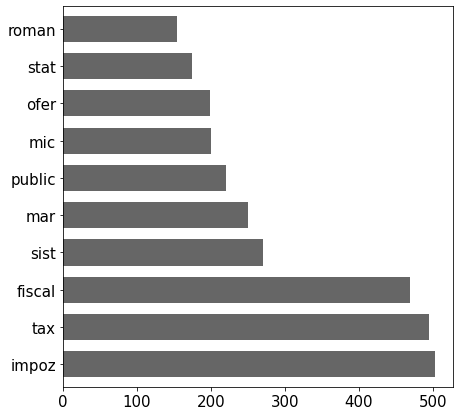

In [ ]:
# Top 10 most frequent words
words_trust['all_responses_prep'].value_counts()[:10].plot(kind='barh', figsize=(7, 7), color='#666666', zorder=2, width=0.7, fontsize=15)
#words_trust.to_csv(os.path.join(path, 'data', 'words_trust.csv'), index=False) # save the dataset for more visualization purposes

In [ ]:
words = df_text['all_responses_prep'].to_list()
words_l = [item for sublist in words for item in sublist]

In [ ]:
# Most frequent bi-grams and tri-grams
bigrams_series = (pd.Series(nltk.ngrams(words_l, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words_l, 3)).value_counts())[:20]

Text(0.5, 1.0, '20 Most Frequently Occuring Bigrams')

Text(0, 0.5, 'Bigram')

Text(0.5, 0, 'Frequency')

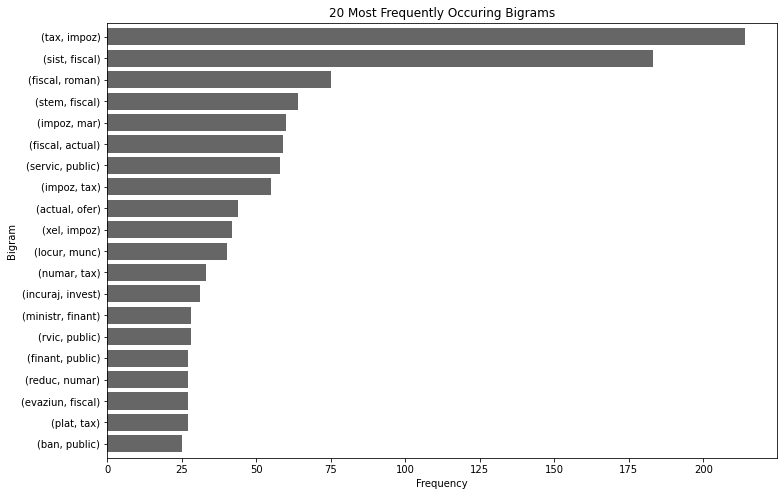

In [ ]:
bigrams_series.sort_values().plot.barh(color='#666666', width=.8, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 1.0, '20 Most Frequently Occuring Bigrams')

Text(0, 0.5, 'Trigram')

Text(0.5, 0, 'Frequency')

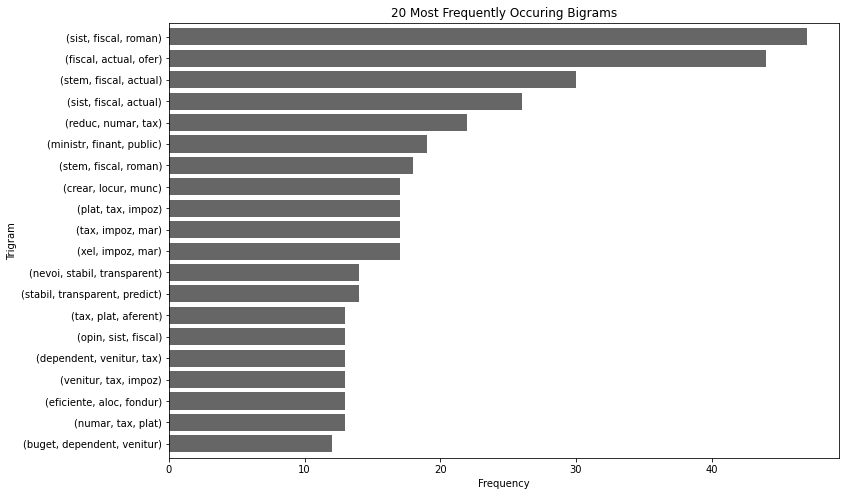

In [ ]:
trigrams_series.sort_values().plot.barh(color='#666666', width=.8, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

## 7.4. Analysis of the words that make a difference between the two groups: 0 and 1

In [ ]:
# Let's try to see which are the words which are specific to only one category of trust
all_responses_dict = words_trust[['incredere_sist_fiscal', 'all_responses_prep']].to_dict()
# all_responses_dict

In [ ]:
words_trust.head()

,incredere_sist_fiscal,all_responses_prep
0,1,injustet
1,1,social
2,1,impun
3,1,exces
4,1,privileg


In [ ]:
trigrams_trust.head()

,incredere_sist_fiscal,tri-grams
0,1,injustet social impun
1,1,social impun exces
2,1,impun exces privileg
3,1,exces privileg rezerv
4,1,privileg rezerv stat


In [ ]:
bigrams_trust.head()

,incredere_sist_fiscal,bi-grams
0,1,injustet social
1,1,social impun
2,1,impun exces
3,1,exces privileg
4,1,privileg rezerv


In [ ]:
df_responses_trust.head()

,incredere_sist_fiscal,all_responses_prep,bi-grams,tri-grams
0,1,"[injustet, social, impun, exces, privileg, rez...","[injustet social, social impun, impun exces, e...","[injustet social impun, social impun exces, im..."
1,1,"[eficient, utilizar, sum, ban, stran, tax, imp...","[eficient utilizar, utilizar sum, sum ban, ban...","[eficient utilizar sum, utilizar sum ban, sum ..."
2,0,"[ganiz, probabil, deficitar, circuit, lung, pa...","[ganiz probabil, probabil deficitar, deficitar...","[ganiz probabil deficitar, probabil deficitar ..."
3,1,"[incred, sist, stiu, schimb, privint, stiu]","[incred sist, sist stiu, stiu schimb, schimb p...","[incred sist stiu, sist stiu schimb, stiu schi..."
4,0,"[scalitat, roman, plin, contradict, mplific, l...","[scalitat roman, roman plin, plin contradict, ...","[scalitat roman plin, roman plin contradict, p..."
